In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import math

In [2]:
# create index list and shuffle it to shuffle data points 
# shuffling helps to update parameters without skew.
def shuffle(x,y,classes):
    indexes = [i for i in range(len(x))]
    random.shuffle(indexes)
    x = [x[i] for i in indexes]
    y = [y[i] for i in indexes]
    classes = [classes[i] for i in indexes]
    return x, y, classes

In [3]:
def linearly_separable_data():
    x_data = []
    y_data = []
    marker_color = []

    x_red, y_red = np.meshgrid([1, 2, 3], [1, 2, 3], indexing='ij')
    x_data.extend(x_red.flatten())
    y_data.extend(y_red.flatten())
    marker_color += ['red']*x_red.size

    x_blue, y_blue = np.meshgrid([-1, -2, -3],[-1, -2, -3], indexing='ij')
    x_data.extend(x_blue.flatten())
    y_data.extend(y_blue.flatten())
    marker_color += ['blue']*x_blue.size
    return x_data, y_data, marker_color

In [4]:
def linear_classifier(seed_=None, x_data=None, y_data=None, classes_=None, weights=None, eval=False, iter=10):
    if not x_data or not y_data or not classes_:
        x_data, y_data, classes_ = linearly_separable_data()
    x_, y_ = x_data, y_data

    #red class is 1, blue class is 0
    
    # for reproducability, define seed
    if not seed_:
        seed_ = np.random.randint(1024)
        print("seed is ",seed_)
    np.random.seed(seed_) #seed_ 456 gives accuracy 0.94
    if weights is None:
        weights = np.random.rand(2)
    lr = 0.001
    iter_ = iter
    max_ = 1
    correct = 0
    total = 0
    classes_ = [1 if cl=="red" else 0 for cl in classes_]
    for _ in range(iter_):
        x_, y_, classes_ = shuffle(x_, y_, classes_)    
        for i in range(len(classes_)):
            total += 1
            target = classes_[i]
            weighted_sum = math.e**(weights[0]*x_[i] + weights[1]*y_[i])
            if weighted_sum>max_:
                max_ = weighted_sum
            #normalize weighted_sum
            normalized = weighted_sum/max_
            if normalized >= 0.5:
                pred = 1
            else:
                pred = 0
            if not eval: # can take model into eval mode. and dont update weights
                weights[0] += (0.5-normalized)*lr
                weights[1] += (0.5-normalized)*lr
            if target == pred:
                correct += 1
    accuracy = correct/total
    
    #return the original point to plot
    return accuracy,weights,x_data,y_data

In [5]:
accuracy,weights,x_data,y_data = linear_classifier(seed_=456)

In [6]:
linear_classifier(weights=weights, eval=True, iter=1)

seed is  42


(0.9444444444444444,
 array([0.26656464, 0.18087552]),
 [1, 1, 1, 2, 2, 2, 3, 3, 3, -1, -1, -1, -2, -2, -2, -3, -3, -3],
 [1, 2, 3, 1, 2, 3, 1, 2, 3, -1, -2, -3, -1, -2, -3, -1, -2, -3])

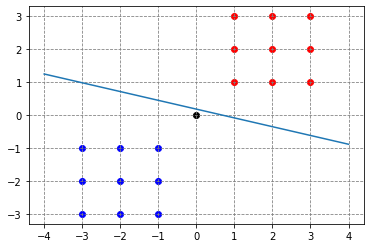

In [7]:
plt.scatter(0, 0, color='black')
plt.scatter(x_data[:9], y_data[:9], color='r')
plt.scatter(x_data[9:], y_data[9:], color='b')
x_values = np.linspace(-4,4,100)
y_values = -weights[0]*x_values + weights[1]
plt.plot(x_values, y_values)
plt.grid(color='gray', linestyle='dashed')

<b>Let's create two cirles, which we cannot classify with a linear line.

In [8]:
N = 101 # number of data points in each circle
t = np.linspace(0,1,N)
r_list = [0.25,1.0] # radius list for circles


x_list = []
y_list = []
for i,r in enumerate(r_list):
    x = r*np.sin(2*np.pi*t) + np.random.randn(N)*0#0.03
    y = r*np.cos(2*np.pi*t) + np.random.randn(N)*0#0.03
    
    x_list.append(x)
    y_list.append(y)

# consolidate data
x_arr = np.concatenate(x_list)
y_arr = np.concatenate(y_list)
data_arr = np.stack([x_arr,y_arr],axis=0)
label_arr = np.concatenate([np.zeros(N,dtype=np.uint8),np.ones(N,dtype=np.uint8)])

# initiate all with the color of 1st quadrant
marker_color_arr = np.ones(2*N,dtype=np.uint8)

# 2nd quadrant
indices = (data_arr[0] < 0) & (data_arr[1] >= 0)
marker_color_arr[indices] = 2

# 3rd quadrant
indices = (data_arr[0] < 0) & (data_arr[1] < 0)
marker_color_arr[indices] = 3

# 4th quadrant
indices = (data_arr[0] >= 0) & (data_arr[1] < 0)
marker_color_arr[indices] = 4

In [9]:
unique_label_arr = np.unique(label_arr)
num_labels = len(unique_label_arr)
num_labels

2

In [10]:
label_0_indices = label_arr==unique_label_arr[0] 
label_1_indices = label_arr==unique_label_arr[1] 

In [11]:
data_arr_0 = data_arr[:,label_0_indices]
data_arr_1 = data_arr[:,label_1_indices]

In [12]:
label_arr_0 = label_arr[label_0_indices]
label_arr_1 = label_arr[label_1_indices]

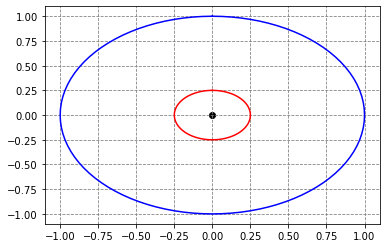

In [13]:
plt.scatter(0, 0, color='black')
plt.plot(data_arr_0[0], data_arr_0[1], color='r',)
plt.plot(data_arr_1[0], data_arr_1[1], color='b',)
plt.grid(color='gray', linestyle='dashed')

In [14]:
new_x_2 = []
new_x_2.extend(data_arr[0].flatten())

In [15]:
new_y_2 = []
new_y_2.extend(data_arr[1].flatten())

In [16]:
new_classes_2 = []
new_classes_2.extend(label_arr.flatten())

In [17]:
accuracy,weights,x_data,y_data = linear_classifier(x_data=new_x_2, y_data=new_y_2, classes_=new_classes_2)

seed is  996


In [18]:
linear_classifier(x_data=new_x_2, y_data=new_y_2, classes_=new_classes_2, weights=weights, eval=True, iter=1)[:2]

seed is  521


(0.0, array([-0.19304268, -0.07577947]))

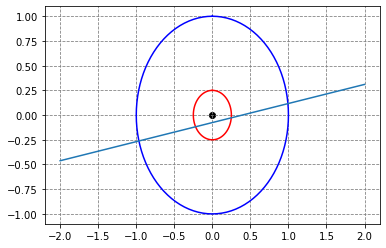

In [19]:
plt.scatter(0, 0, color='black')
plt.plot(x_data[:101], y_data[:101], color='r',)
plt.plot(x_data[101:], y_data[101:], color='b',)
x_values = np.linspace(-2,2,100)
y_values = -weights[0]*x_values +weights[1]
plt.plot(x_values, y_values)
plt.grid(color='gray', linestyle='dashed')

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torch.utils.data

torch.manual_seed(23)
nonlinearity = 'relu'

class SimpleNN(nn.Module):
    def __init__(self, num_features=1):
        super().__init__()
        
        self.fc1 = nn.Linear(2, num_features, bias=True)
        self.fc2 = nn.Linear(num_features, 2, bias=True)
        
    def forward(self, x):
        s1 = self.fc1(x)
        if nonlinearity == 'relu':
            z1 = F.relu(s1)
        elif nonlinearity == 'sigmoid':    
            z1 = torch.sigmoid(s1)
        elif nonlinearity == 'tannh': 
            z1 = torch.tanh(s1)
        else:
            z1 = s1
        y = self.fc2(z1)
        return s1,z1,y

In [21]:
# convert numpy arrays to tensors
samples = torch.as_tensor(data_arr.transpose(), dtype=torch.float32)
labels = torch.as_tensor(label_arr, dtype=torch.long)

dataset_train = torch.utils.data.TensorDataset(samples,labels)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=4, shuffle=True, num_workers=0)

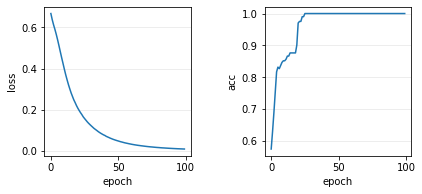

In [22]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# init the model
model = SimpleNN(num_features=3)

model.to(device)

# define criterion/loss function
criterion = nn.CrossEntropyLoss()

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=3e-3, weight_decay=1e-5)

num_epochs = 100
train_loss_list = []
train_acc_list = []
for epoch in range(num_epochs):
    
    # set the model into training mode
    model.train()
    
    num_predictions = 0
    running_loss = 0.0
    running_num_correct_preds = 0
    
    for i, (temp_sample, temp_label) in enumerate(dataloader_train):
        # push the mini-batch of data into device
        # if you have a GPU, the data will be pushed into GPU
        temp_sample, temp_label = temp_sample.to(device), temp_label.to(device)
        
        
        # 1. feed-forward pass
        _,_,temp_output = model(temp_sample)
        
        # 2. calculate the loss
        loss = criterion(temp_output, temp_label)
        
        # 3. clear the gradients, since PyTorch accumulates gradients.
        optimizer.zero_grad()
        
        # 4. backward pass (back-propagation)
        # to compute gradients of parameters
        loss.backward()
        
        # 5. update the parameters
        optimizer.step()
        
        
        # get the predicted labels
        _, predicted_label = torch.max(temp_output, 1)
        
        num_correct_preds = (predicted_label == temp_label).sum().item()
        
        num_samples = temp_label.size(0)
        num_predictions += num_samples
        
        running_loss += loss.item() * num_samples
        running_num_correct_preds += num_correct_preds
        
    train_loss = running_loss / num_predictions
    train_acc = running_num_correct_preds / num_predictions
    
    
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

# plot the loss and accuracy throughout training
fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(np.arange(num_epochs),train_loss_list)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_axisbelow(True)
ax[0].yaxis.grid(True,which='major',linestyle='-',color='lightgrey',alpha=0.5)

ax[1].plot(np.arange(num_epochs),train_acc_list)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(True,which='major',linestyle='-',color='lightgrey',alpha=0.5)

fig.subplots_adjust(left=0.14, bottom=0.29, right=0.99, top=0.98, wspace=0.50 ,hspace=0.20 )

In [23]:
cmap_list = ['Reds','Blues']

def plot_data(ax,data_arr,label_arr,marker_color_arr):
    unique_label_arr = np.unique(label_arr)
    num_labels = len(unique_label_arr)
   
    ax.set_aspect('equal')
    
    for i in range(num_labels):
        print(i)
        temp_cmap = matplotlib.cm.get_cmap(cmap_list[i])
        
        temp_indices = label_arr==unique_label_arr[i]
        temp_data_arr = data_arr[:,temp_indices]
        temp_label_arr = label_arr[temp_indices]
        temp_marker_color_arr = marker_color_arr[temp_indices]

        ax.scatter(temp_data_arr[0],temp_data_arr[1],s=5,c=temp_marker_color_arr,cmap=temp_cmap,vmin=0)
        
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')

0
1


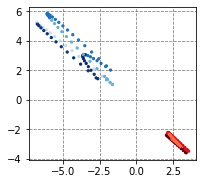

In [24]:
# in eval mode, model weights will not be updated, and gradient will not be computed
model.eval()
samples = torch.as_tensor(data_arr.transpose(), dtype=torch.float32)
with torch.no_grad():
    s1,z1,y = model(samples.to(device))
    
transformed_data = y.cpu().detach().numpy()
fig,ax = plt.subplots(figsize=(3,3))
plot_data(ax,transformed_data.transpose(),label_arr,marker_color_arr)